Получить навыки практической работы с PyTorch.

Используя PyTorch:

    Создать и обучить регрессионную модель, которая аппроксимирует значение функции sin(x + 2*y)exp(-(2x + y)^2) на диапазоне значений [-10;10] по х и у.
    В качестве обучающей выборки необходимо сгенерировать 20000 точек случайным образом.
    Разделить получившийся датасет на train / test / val в отношениях 70% / 15% / 15%, соответственно.

Результаты: a) Посчитать метрику Mean Square Error(MSE) на test. b) Нарисовать график, в котором сравнивается истинная функция и ее аппроксимированный вариант (предсказываемый моделью).|

In [72]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import random
import numpy as np
import math
import pandas as pd
import torch.nn as nn


Создаем датасет

In [73]:
def create_dataset():
  predict = []
  x_data = []
  y_data = []
  variables = []
  for i in range(20000):
    batch_variable = []
    x = random.randint(-10,10) 
    y = random.randint(-10,10)
    
    predict.append(math.sin(x + 2**y)*math.exp(-(2*x + y)**2))

    batch_variable.append(x)
    batch_variable.append(y)
    variables.append(batch_variable)
  return variables, predict

In [74]:
x_y, data = create_dataset()

In [75]:
data = pd.DataFrame(data)

In [76]:
x_y = pd.DataFrame(x_y)

нормализуем данные

In [77]:
#data = (data - data.mean()) / data.std()



Данные нужно разделить в отношении 70/15/15 на обучающую и валидационную выборки.

In [78]:
pivot1 = int(len(data) * 0.7)
pivot2 = int(len(data) * 0.85)


data_train, data_test, data_val = data[:pivot1], data[pivot1:pivot2], data[pivot2:]
data_train = data_train.to_numpy().reshape(-1, 1)
data_test = data_test.to_numpy().reshape(-1, 1)
data_val = data_val.to_numpy().reshape(-1,1)
xtrain, xtest, xval = x_y[:pivot1], x_y[pivot1:pivot2], x_y[pivot2:]

xtrain= xtrain.to_numpy()
xtest = xtest.to_numpy()
xval = xval.to_numpy()


создадим модель

In [209]:


# Создание ANN модели
class linearRegression(nn.Module):
    

        
    
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(linearRegression, self).__init__()
        
        # Линейная функция 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim1) 
        # Не линейная функция 1
        self.tanh1 = nn.Tanh()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # Не линейная функция 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.sigmoid = nn.Sigmoid()
        # Не линейная функция 3

        self.fc4 = nn.Linear(hidden_dim3, output_dim)


    def forward(self, x):
        # Линейная функция 1
        out = self.fc1(x)
        # Не линейная функция 1
        out = self.tanh1 (out)
        
        # Линейная функция 2
        out = self.fc2(out)
        # Не линейная функция 2
        out = self.tanh2(out)
        
        # Линейная функция 3
        out = self.fc3(out)
        out = self.sigmoid(out)
        out = self.fc4(out)
        return out

# Зададим параметры сети
input_dim = 2
hidden_dim1 = 200 
hidden_dim2 = 198
hidden_dim3 = 150

output_dim = 1
# Создадим экземпляр linear Regression
model = linearRegression(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

# Зададим loss функцию как MSE
error = torch.nn.MSELoss() 

# ADAM оптимизатор
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)





обучение модели

In [210]:
epochs = 1000
for epoch in range(epochs):
 
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(xtrain).cuda())
        labels = Variable(torch.from_numpy(data_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(xtrain))
        labels = Variable(torch.from_numpy(data_train))


    optimizer.zero_grad()


    outputs = model(inputs.type(torch.FloatTensor))


    loss = error(outputs, labels.type(torch.FloatTensor))

    
    loss.backward()


    optimizer.step()
    

    inputs2 = Variable(torch.from_numpy(xtest))
    labels2 = Variable(torch.from_numpy(data_test))
    outputs2 = model(inputs2.type(torch.FloatTensor))
    loss2 = error(outputs2, labels2.type(torch.FloatTensor))
    print('epoch {}, train_loss {}, validation_loss {}'.format(epoch, loss.item(), loss2.item()))


epoch 0, train_loss 0.02622302807867527, validation_loss 0.018430054187774658
epoch 1, train_loss 0.01916927844285965, validation_loss 0.025027096271514893
epoch 2, train_loss 0.025664275512099266, validation_loss 0.021306969225406647
epoch 3, train_loss 0.0219904575496912, validation_loss 0.01906525529921055
epoch 4, train_loss 0.019785063341259956, validation_loss 0.01809244230389595
epoch 5, train_loss 0.01884506084024906, validation_loss 0.01817876473069191
epoch 6, train_loss 0.019122863188385963, validation_loss 0.019176576286554337
epoch 7, train_loss 0.02029293216764927, validation_loss 0.01927596516907215
epoch 8, train_loss 0.020394915714859962, validation_loss 0.017800787463784218
epoch 9, train_loss 0.01880953460931778, validation_loss 0.016582515090703964
epoch 10, train_loss 0.017450865358114243, validation_loss 0.01700364053249359
epoch 11, train_loss 0.01774674281477928, validation_loss 0.01802193559706211
epoch 12, train_loss 0.018696242943406105, validation_loss 0.018

## Ошибка на тестовом - 0.00010265425953548402

## Нарисуем графики двух функций

In [211]:
import matplotlib.pyplot as plt

#### График предсказанной 

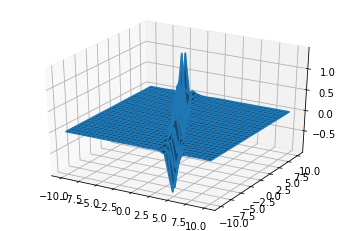

In [212]:
predictor = []
x, y = np.mgrid[-10.0:10.0:30j, -10.0:10.0:30j]

xy = np.column_stack([x.flat, y.flat])
for line in xy:

    g = np.array(line)
    inputs = Variable(torch.Tensor(g))
    predictor.append(model(inputs.type(torch.FloatTensor)).item())

z = np.array(predictor)

z = z.reshape(x.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x,y,z)
ax.plot_wireframe(x,y,z)

plt.show()
plt.show()

#### График реальной

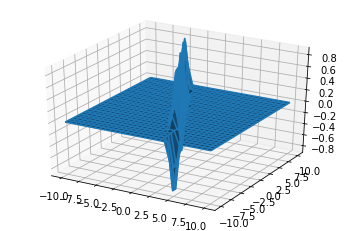

In [213]:
predictor = []
x, y = np.mgrid[-10.0:10.0:30j, -10.0:10.0:30j]

xy = np.column_stack([x.flat, y.flat])

for line in xy:

    x_v = line[0]
    y_v = line[1]
    predictor.append(math.sin(x_v + 2**y_v)*math.exp(-(2*x_v + y_v)**2))

z = np.array(predictor)


z = z.reshape(x.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x,y,z)
ax.plot_wireframe(x,y,z)

plt.show()
plt.show()

### Совместим два графика

<Figure size 2160x2160 with 0 Axes>

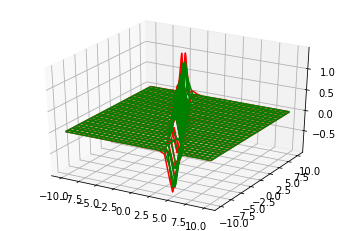

In [214]:
predictor1 = []
predictor2 = []
x, y = np.mgrid[-10.0:10.0:30j, -10.0:10.0:30j]
plt.figure(figsize=(30, 30))
xy = np.column_stack([x.flat, y.flat])

for line in xy:
    g = np.array(line)
    inputs = Variable(torch.Tensor(g))
    predictor1.append(model(inputs.type(torch.FloatTensor)).item())
    x_v = line[0]
    y_v = line[1]
    predictor2.append(math.sin(x_v + 2**y_v)*math.exp(-(2*x_v + y_v)**2))
z1 = np.array(predictor1)
z1 = z1.reshape(x.shape)


z2 = np.array(predictor2)

z2 = z2.reshape(x.shape)
mu1 = np.array([-1.5, -1.5])


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
    
ax.plot_wireframe(x,y,z2, color="green")

ax.plot_wireframe(x,y,z1, color="red")


plt.show()

